In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def power_at_speed(v_mph, m_lb=190):
    # simple steady state model: P=Crr*m*g*v + 1/2*CdA*ro*v^3
    Crr = 0.005*2 # doubling to simulate "gravel"
    CdA = 0.3
    ro = 1.1839 # 25 deg C, sea level
    
    m = m_lb*0.453592
    v = v_mph*1609.34/3600
    
    return Crr*m*9.81*v + 0.5*CdA*ro*v**3

In [47]:
def plot_cassette(cogs, chainring, title, circ=2205.4, cad_lo=85, cad_hi=95):
    cogs = np.array(cogs)
    gear_inches = chainring/cogs*circ/np.pi/25.4
    speed_lo = gear_inches * cad_lo * np.pi / 1056
    speed_hi = gear_inches * cad_hi * np.pi / 1056

    plt.figure(figsize=(20,10))
    plt.hlines(cogs, speed_lo, speed_hi, color='red')
    plt.vlines(speed_lo, np.min(cogs), np.max(cogs), linestyles='dotted', colors='silver', linewidth=0.5)
    plt.vlines(speed_hi, np.min(cogs), np.max(cogs), linestyles='dotted', colors='silver', linewidth=0.5)
    _ = plt.yticks(cogs)
    for i in range(len(cogs)):
        plt.annotate("{:.1f}".format(speed_lo[i]), (speed_lo[i], cogs[i]))
        plt.annotate("{:.1f}".format(speed_hi[i]), (speed_hi[i], cogs[i]))
        
        plt.annotate("({:.0f})".format(power_at_speed(speed_lo[i])), (speed_lo[i], cogs[i]-0.5))
        plt.annotate("({:.0f})".format(power_at_speed(speed_hi[i])), (speed_hi[i], cogs[i]-0.5))
        
    plt.xlabel("speed [mph]")
    plt.ylabel("cogs")
    plt.title(title)
    plt.xlim(5,40)

In [48]:
circ=2205.4 # 700Cx40mm

chainring = 40
cogs_csmx8 = [11, 13, 15, 17, 19, 21, 24, 28, 32, 36, 42]
cogs_R8000_11x30 = [11, 12, 13, 14, 15, 17, 19, 21, 24, 27, 30] 
cogs_R8000_11x32 = [11, 12, 13, 14, 16, 18, 20, 22, 25, 28, 32]
cogs_R8000_11x25 = [11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 25]
cogs_sram_10x28 = [10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 24, 28]

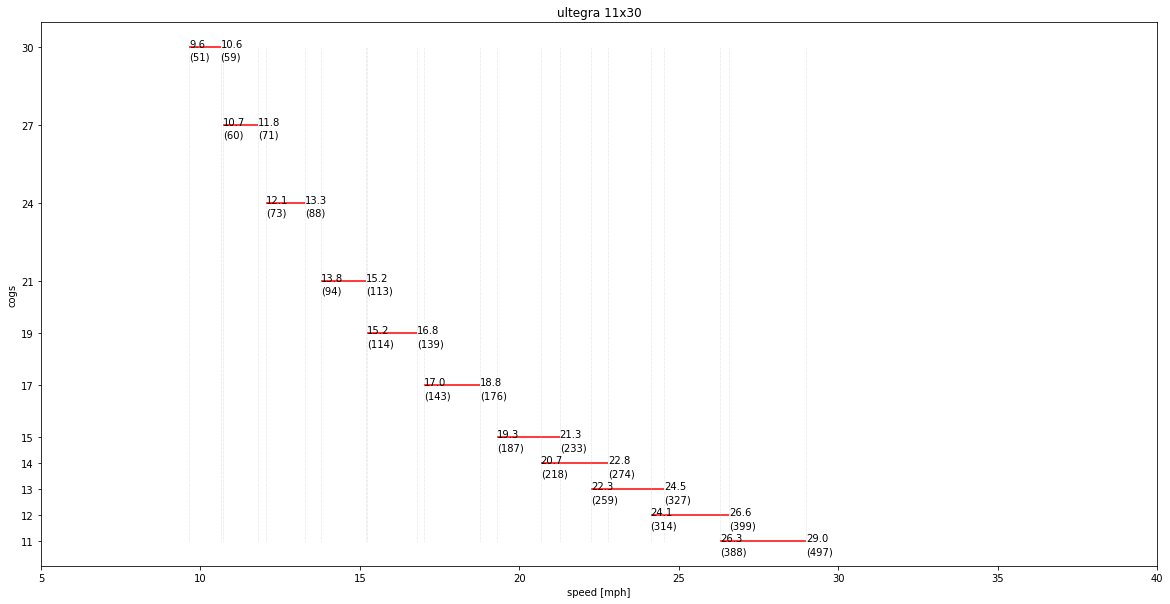

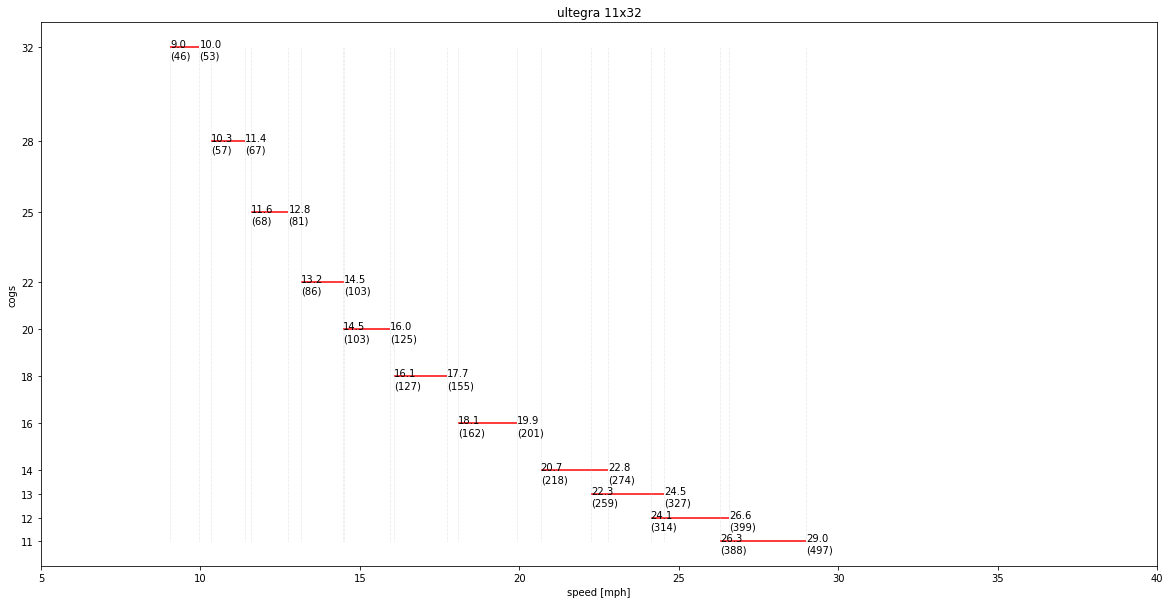

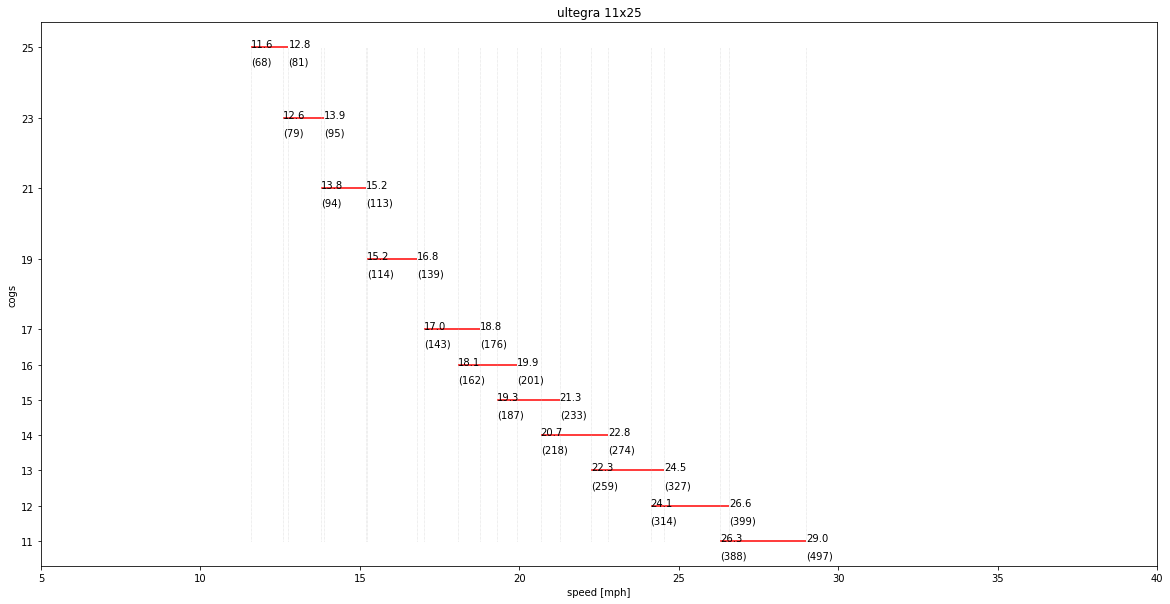

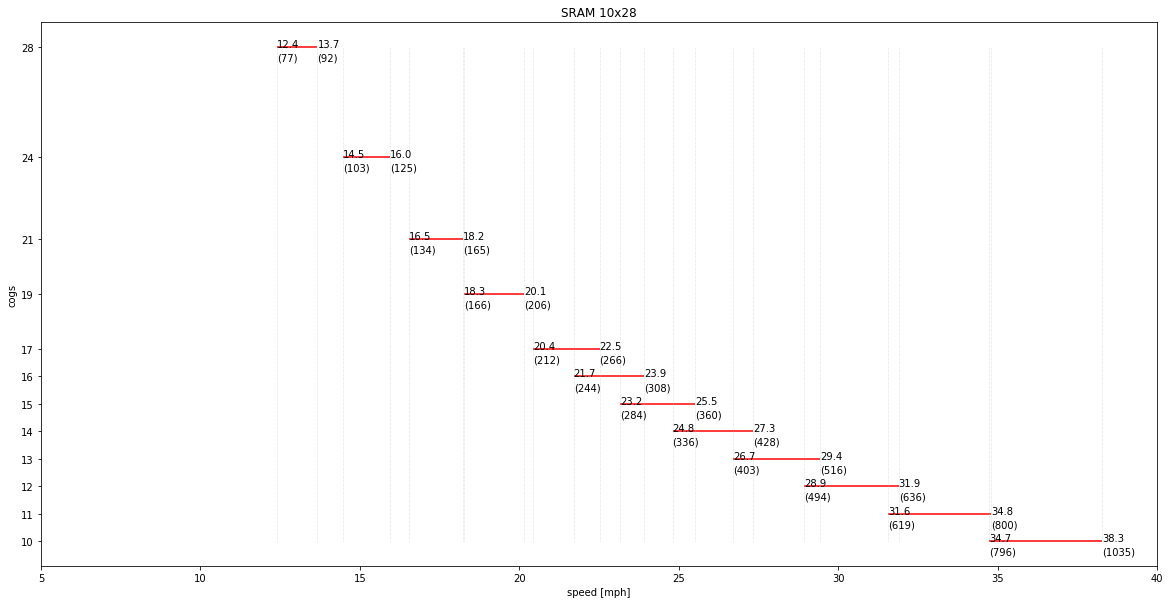

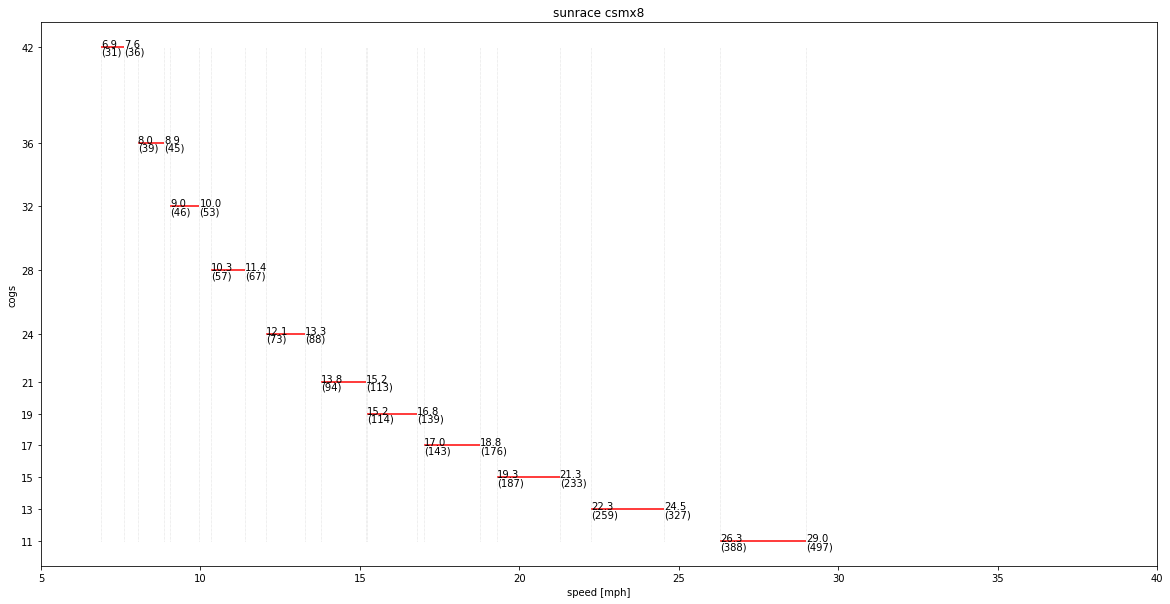

In [49]:
plot_cassette(cogs_R8000_11x30, 40, "ultegra 11x30", cad_lo=88, cad_hi=97)
plot_cassette(cogs_R8000_11x32, 40, "ultegra 11x32", cad_lo=88, cad_hi=97)
plot_cassette(cogs_R8000_11x25, 40, "ultegra 11x25", cad_lo=88, cad_hi=97)
plot_cassette(cogs_sram_10x28, 48, "SRAM 10x28", cad_lo=88, cad_hi=97)
plot_cassette(cogs_csmx8, 40, "sunrace csmx8", cad_lo=88, cad_hi=97)